### NLP Project: Idenifying Spam Emails Using NLP Machine Learning ###

**Get The Data**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Open the text collection and extract each line of message to explore the format of the collection

text_collection = open('NLP/SMSSpamCollection')
messages = [line.rstrip() for line in text_collection]

*Each message has \t separator between "ham/spam" label and the message. Now creating the data frame for the collection*

In [4]:
df = pd.read_csv('NLP/SMSSpamCollection', sep='\t', names=['Label', 'Messages'])

In [5]:
df

,Label,Messages
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


### Explore and Visualize Data ###

In [6]:
len(df['Messages']) # How many texts in total

5572

In [7]:
df.groupby('Label').describe()

Messages                                                               
         count unique                                                top freq
Label                                                                        
ham       4825   4516                             Sorry, I'll call later   30
spam       747    653  Please call our customer service representativ...    4

<AxesSubplot:xlabel='Label', ylabel='count'>

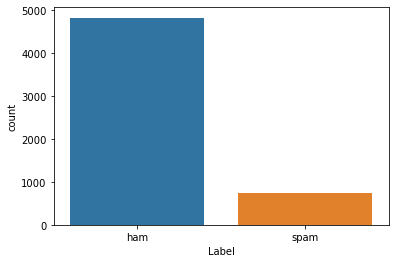

In [8]:
sns.countplot(x='Label', data=df)

# The amount of ham and spam text is not balanced

In [9]:
# See whether there is relationship between the length of each message and the label. 
# Add another columns length of each message
df['Length'] = df['Messages'].apply(lambda x: len(x))

In [10]:
df

,Label,Messages,Length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,160
5568,ham,Will ü b going to esplanade fr home?,36
5569,ham,"Pity, * was in mood for that. So...any other s...",57
5570,ham,The guy did some bitching but I acted like i'd...,125


<AxesSubplot:xlabel='Length', ylabel='Count'>

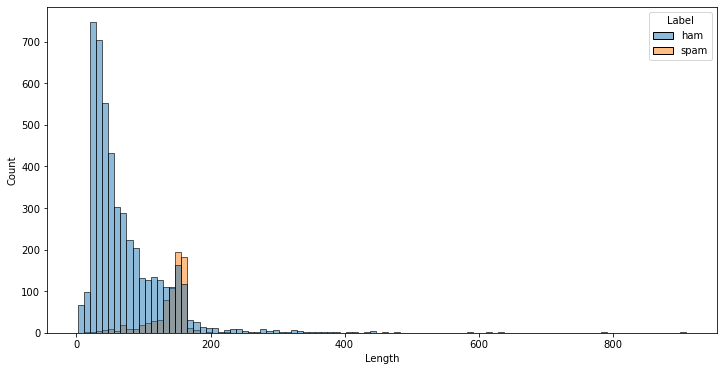

In [11]:
plt.figure(figsize=(12, 6))
sns.histplot(df, x='Length', hue='Label', bins=100)

**Notice**: Looks like the length ham label messages have the most distribution around 50-80 words. The spam's distribution is around 170 words. Spam messages tend to be lengthy and might be abundant in words

### Text Preprocessing ##

In [ ]:
contractions = { 
"ain't": "am not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he had",
"he'd've": "he would have",
"he'll": "he will",
"he'll've": "he will have",
"he's": "hehe is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how is",
"i'd": "i would",
"i'd've": "i would have",
"i'll": "i will",
"i'll've": "i will have",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'd've": "it would have",
"it'll": "it will",
"it'll've": "it will have",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she would",
"she'd've": "she would have",
"she'll": "she will",
"she'll've": "she will have",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so is",
"that'd": "that would",
"that'd've": "that would have",
"that's": "that is",
"there'd": "there would",
"there'd've": "there would have",
"there's": "there is",
"they'd": "they would",
"they'd've": "they would have",
"they'll": "they will",
"they'll've": "they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what'll've": "what will have",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"when's": "when is",
"when've": "when have",
"where'd": "where did",
"where's": "where is",
"where've": "where have",
"who'll": "who will",
"who'll've": "who will have",
"who's": "who is",
"who've": "who have",
"why's": "why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you would",
"you'd've": "you would have",
"you'll": "you will",
"you'll've": "you will have",
"you're": "you are",
"you've": "you have"
}

In [ ]:
# Cleaning the message

import string
from nltk.corpus import stopwords

def text_process(text):
    
    """
    1. Expand contractions 
    2. Remove punctuation
    3. Remove stopwords (common words)
    4. Return a clean message
    """
    clear_contract = []
    for w in text.split(' '):
        for key, val in contractions.items():
            if w.lower() == key:
                w = val
        clear_contract.append(w)
    clear_contract = ' '.join(clear_contract)
    
    no_punc = [letter for letter in clear_contract if letter not in string.punctuation]
    no_punc = ''.join(no_punc).split(' ')
    clean_text = [word for word in no_punc if word.lower() not in stopwords.words('english')]
    
    return ' '.join(clean_text)

In [15]:
df['Messages'] = df['Messages'].apply(text_process)

### Training Model using Pipeline ###

In [16]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

In [17]:
mess = df['Messages']
label = df['Label']

mess_train, mess_test, label_train, label_test = train_test_split(mess, label, test_size=0.33, random_state=42)

In [18]:
model = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)), # strings to token integer count
    ('tfidf', TfidfTransformer()), # weighted TF-IDF score
    ('classifier', RandomForestClassifier()) # train the model on Naive Bayes classifier
])

In [19]:
model.fit(mess_train, label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x000001AFCE14A5E0>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', RandomForestClassifier())])

### Evaluate The Model ###

In [20]:
predictions = model.predict(mess_test)

In [21]:
from sklearn.metrics import classification_report, confusion_matrix

In [22]:
print(classification_report(label_test, predictions))

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      1593
        spam       0.99      0.88      0.93       246

    accuracy                           0.98      1839
   macro avg       0.99      0.94      0.96      1839
weighted avg       0.98      0.98      0.98      1839



In [23]:
print(confusion_matrix(label_test, predictions))

[[1591    2]
 [  30  216]]
